## Machine Learning Library:

pandas

numpy

scikit-learn

seaborn

matplotlib


## Deep Learning library:

tensorflow

kears

pytorch

opencv

nltk

gensim

spacy


In [ ]:
car_img_path = "/content/car.jpeg"

In [ ]:
car_img_path

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 # opencv

In [ ]:
cv2.imread(car_img_path)

In [ ]:
img = cv2.imread(car_img_path)

In [ ]:
img.shape

In [ ]:
plt.imshow(img) # plt.imshow(img) covert R,G,B into B,G,R That's why it show in Different color campare to Original image's color

In [ ]:
img2 = cv2.cvtColor(img,cv2. COLOR_BGR2RGB) # Convert BGR to RGB

In [ ]:
img2.shape

In [ ]:
plt.imshow(img2) # Original Image

In [ ]:
img3 = cv2.cvtColor(img,cv2. COLOR_BGR2GRAY) # Convert BGR to GRAY

In [ ]:
img3.shape

In [ ]:
plt.imshow(img3, cmap="gray")

In [ ]:
from google.colab.patches import cv2_imshow # Another way to display the image
cv2_imshow(img)

In [ ]:
img3.shape

In [ ]:
row,col = img3.shape

In [ ]:
car = img3.reshape(1,row,col,1) # (1,row,col,1):first 1 is number of image, row,col is dimension of image and , 1 is nimber of channels

In [ ]:
car.shape

In [ ]:
Conv_layers = [tf.keras.layers.Conv2D(
    filters = 1,
    kernel_size=(3,3),
    strides = (1,1),
    input_shape = car.shape[1:]
)]

In [ ]:
conv_model = tf.keras.Sequential(Conv_layers)

In [ ]:
conv_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 166, 298, 1)       10        
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
output = conv_model.predict(car)

1/1 [==============================] - 7s 7s/step


In [ ]:
output.shape

(1, 166, 298, 1)

In [ ]:
 output.shape[1:-1]

(166, 298)

In [ ]:
row,col = output.shape[1:-1]

In [ ]:
reshaped_output=output.reshape(row,col)

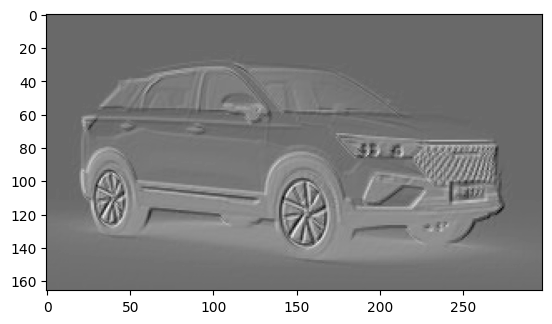

In [ ]:
plt.imshow(reshaped_output,cmap="gray")

In [ ]:
img2.shape

(168, 300, 3)

In [ ]:
row,col,depth=img2.shape

In [ ]:
color_car = img2

In [ ]:
color_car.reshape(1,row,col,depth)

array([[[[237, 237, 237],
         [237, 237, 237],
         [237, 237, 237],
         ...,
         [237, 237, 237],
         [237, 237, 237],
         [237, 237, 237]],

        [[237, 237, 237],
         [237, 237, 237],
         [237, 237, 237],
         ...,
         [237, 237, 237],
         [237, 237, 237],
         [237, 237, 237]],

        [[237, 237, 237],
         [237, 237, 237],
         [237, 237, 237],
         ...,
         [237, 237, 237],
         [237, 237, 237],
         [237, 237, 237]],

        ...,

        [[216, 216, 216],
         [216, 216, 216],
         [216, 216, 216],
         ...,
         [211, 211, 211],
         [211, 211, 211],
         [211, 211, 211]],

        [[217, 217, 217],
         [217, 217, 217],
         [217, 217, 217],
         ...,
         [213, 213, 213],
         [213, 213, 213],
         [213, 213, 213]],

        [[217, 217, 217],
         [217, 217, 217],
         [217, 217, 217],
         ...,
         [214, 214, 214],
        

In [ ]:
reshaped_color_img=color_car.reshape(1,row,col,depth)

In [ ]:
reshaped_color_img.shape

(1, 168, 300, 3)

In [ ]:
reshaped_color_img.shape[1:]

(168, 300, 3)

In [ ]:
CONV_LAYER=[tf.keras.layers.Conv2D(
    filters=1,
    kernel_size=(3,3),
    strides=(1,1),
    input_shape=reshaped_color_img.shape[1:]
)]

In [ ]:
conv_model=tf.keras.Sequential(CONV_LAYER)

In [ ]:
conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
color_output=conv_model.predict(reshaped_color_img)

1/1 [==============================] - 0s 77ms/step


In [ ]:
color_output.shape

(1, 166, 298, 1)

In [ ]:
row,col=color_output.shape[1:-1]

In [ ]:
reshaped_output=color_output.reshape(row,col)

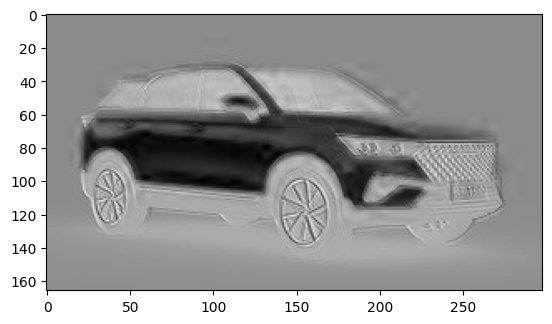

In [ ]:
plt.imshow(reshaped_output,cmap="gray")

# Max Pooling

In [ ]:
color_car.shape

(168, 300, 3)

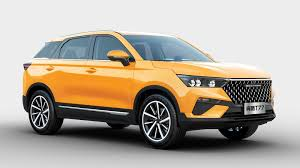

In [ ]:
from google.colab.patches import cv2_imshow # Another way to display the image
cv2_imshow(img)

In [ ]:
def reshaping_in(img, grayscale=True):
  if grayscale:
    row,col = img.shape
    img = img.reshape(1,row,col,1) # grayscale
    return img
  row,col,depth = img.shape
  color_img = img.reshape(1,row,col,depth) # colored
  return color_img

In [ ]:
def max_pooling(img,pool_size=(2,2),strides=(2,2)):
  reshaped_img = reshaping_in(img,grayscale=False)
  pooling_layer = tf.keras.layers.MaxPool2D(pool_size=pool_size,strides=strides)
  result = pooling_layer(reshaped_img)
  return result

In [ ]:
result=max_pooling(color_car)

In [ ]:
result

<tf.Tensor: shape=(1, 84, 150, 3), dtype=uint8, numpy=
array([[[[237, 237, 237],
         [237, 237, 237],
         [237, 237, 237],
         ...,
         [237, 237, 237],
         [237, 237, 237],
         [237, 237, 237]],

        [[237, 237, 237],
         [237, 237, 237],
         [237, 237, 237],
         ...,
         [237, 237, 237],
         [237, 237, 237],
         [237, 237, 237]],

        [[237, 237, 237],
         [237, 237, 237],
         [237, 237, 237],
         ...,
         [237, 237, 237],
         [237, 237, 237],
         [237, 237, 237]],

        ...,

        [[213, 213, 213],
         [213, 213, 213],
         [213, 213, 213],
         ...,
         [207, 207, 207],
         [207, 207, 207],
         [207, 207, 207]],

        [[216, 216, 216],
         [216, 216, 216],
         [216, 216, 216],
         ...,
         [211, 211, 211],
         [211, 211, 211],
         [211, 211, 211]],

        [[217, 217, 217],
         [217, 217, 217],
         [217, 217,

In [ ]:
# Tensor
result.shape

TensorShape([1, 84, 150, 3])

In [ ]:
def plot(result):
  _,row,col,_=result.shape
  reshaped_img=tf.reshape(result,(row,col,3))
  plt.imshow(reshaped_img)

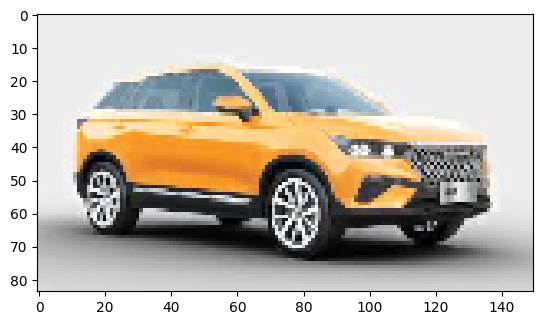

In [ ]:
plot(result)

In [ ]:
def reshaping_in(img, grayscale=True):
  if grayscale:
    row,col = img.shape
    img = img.reshape(1,row,col,1) # grayscale
    return img
  row,col,depth = img.shape
  color_img = img.reshape(1,row,col,depth) # colored
  return color_img

In [ ]:
def get_conv_model(filters=1, filter_size=(3,3), strides=(1,1), input_shape=None, padding="valid"):
  CONV_LAYER = [tf.keras.layers.Conv2D(filters=filters,
                                      kernel_size=filter_size,
                                      strides=(1,1),
                                      input_shape=input_shape,
                                      padding=padding)]

  conv_model = tf.keras.Sequential(CONV_LAYER)
  conv_model.summary()
  return conv_model

In [ ]:
def apply_conv_model_and_visualize(img, conv_model):
  try:
    out = conv_model.predict(img)
    print(out.shape)
    row, col, depth = out.shape[1:]
    reshape_out = out.reshape(row, col, depth)

    for d in range(depth):
      plt.imshow(reshape_out[:,:,d], cmap="gray")
      plt.show()

  except Exception as e:
    raise e

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 166, 298, 10)      280       
                                                                 
Total params: 280 (1.09 KB)
Trainable params: 280 (1.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 68ms/step
(1, 166, 298, 10)


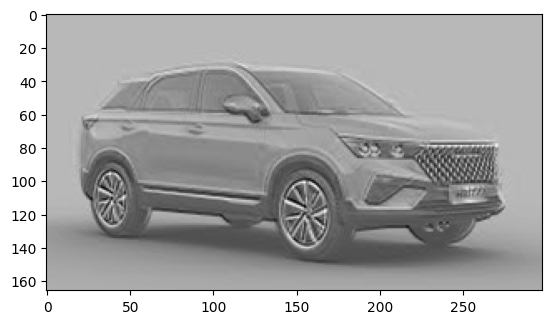

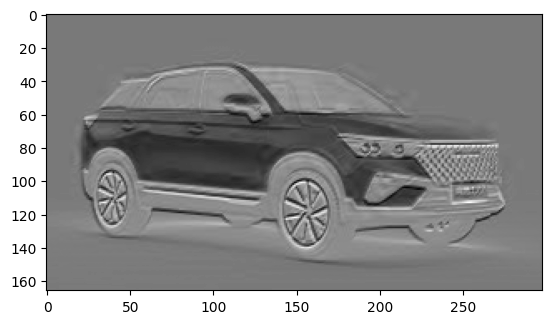

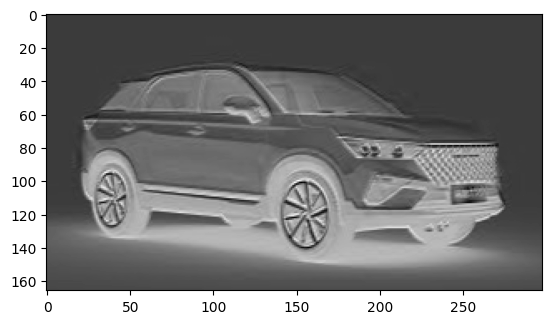

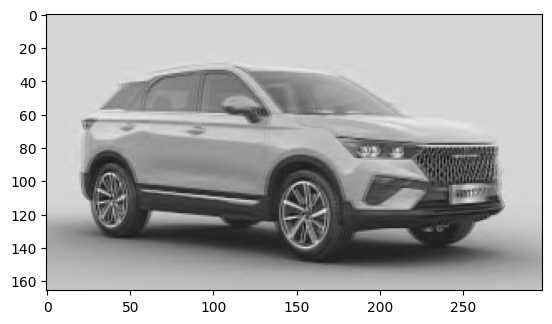

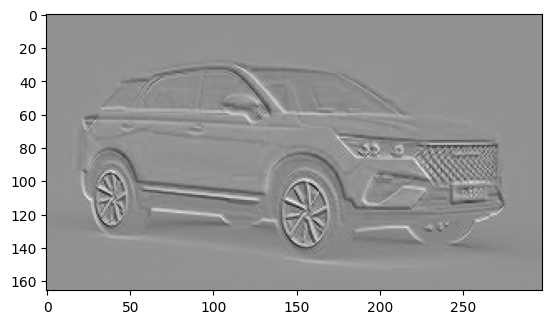

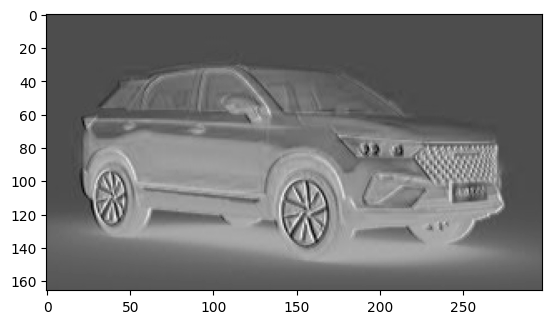

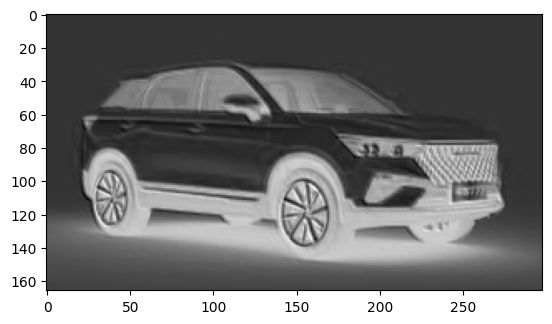

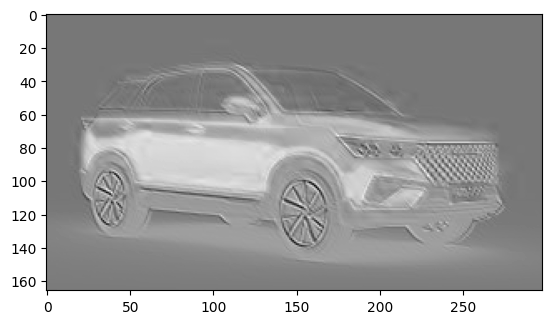

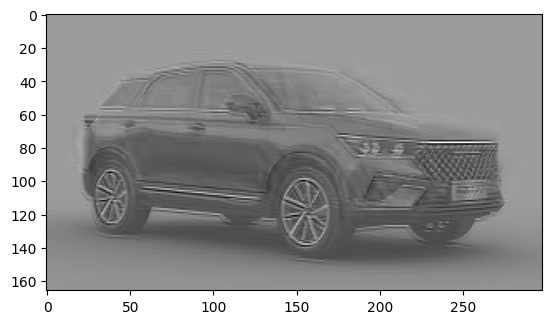

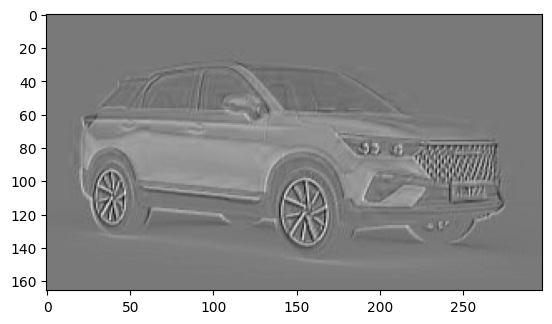

In [ ]:
input_img=reshaping_in(color_car,grayscale=False)
model=get_conv_model(filters=10,filter_size=(3,3),strides=(1,1),input_shape=input_img.shape[1:])
apply_conv_model_and_visualize(input_img,model)